Programmer: Colleen Lemak  
Class: CPSC222, Fall 2021  
Quantified Self Project  
Date: 12/06/21    
Description: This file uses Jupyter Notebook and Python to tell a data story and execute various tasks.

# Exploring My Sleep Data!

## Introduction
Getting quality sleep is crucial to a productive day and a healthy lifestyle, which made me curious and inclined to gain insight into my sleep schedule.

* My sleep data is stored in a CSV file, and tables included are my sleep data information and the days of the week information; additionally, statistics are collected through my Apple Watch's "Sleep++" application, and this data is merged with another CSV file of the day of the week.

* Relevant attributes in the CSV file include the start and end date of the night of sleep, total duration of sleep, restful minutes, restless minutes, and awake minutes.

Our main goal is to make a prediction about my sleep data, and discover insights.  

* I want to predict that the amount of sleep I receive on Monday and Wednesday nights is higher than Tuesday and Thursday nights' rest.
* Why do we care?
    * These results could potentially impact how I think about my sleep and how I prioritize sleep on a given night, especially if I know I am more prone to sleep fewer hours on one night in comparison to another.
    * Stakeholders interested in my results could be various researchers studying mental health of college students, or companies who market to adults such as Melatonin brands.

Dataset Details
1. It spans the time frame of the majority of the school year.
    * Monday, August 31 through Monday, November 15
2. Sleep data is recorded in minutes.
3. Information is collected through Apple Watch's connection to the Sleep++ application.

## Data Analysis

First, let's open, load, and store our sleep data in a data frame.

Then, before performing calculations, we must make sure the data has notable entries by properly cleaning the data.  
* This dataset did not have many missing values, as I wore my watch to bed most nights.  
* For the few data entries that were missing, I averaged the previous and succeding entries to interpolate that missing value.
* There are challenges in preparing and cleaning data, especially if there are missing values, or noisy or invalid entries that are not relevant.

In [40]:
import utils
import importlib
import scipy.stats as stats
importlib.reload(utils)

<module 'utils' from 'c:\\Users\\clema\\OneDrive\\Documents\\CPSC 222\\QuantifiedSelfProject\\utils.py'>

In [41]:
sleep_data_df = utils.load_and_store_data("my_sleep.csv")
sleep_data_df = utils.clean_data(sleep_data_df)

Now, let's parse through data to visualize the 95% confidence interval for my the population mean of restful minutes sleeping.

Margin of error: 13.72
We are 95% confident the population mean (number of minutes slept each night) is in (436.89, 464.33)


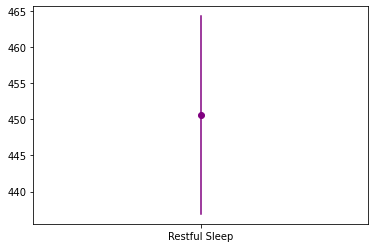

In [42]:
restful_minutes = sleep_data_df["Restful Minutes"]
dates = sleep_data_df["Start"]
utils.compute_and_visualize_conf_interval(restful_minutes, 2.000, "Restful Sleep")

We can now look at the mean in a different way by visualizing all of the data points on a bar graph.

0     453
1     452
2     505
3     485
4     452
     ... 
72    488
73    366
74    484
75    395
76    384
Name: Restful Minutes, Length: 77, dtype: int64


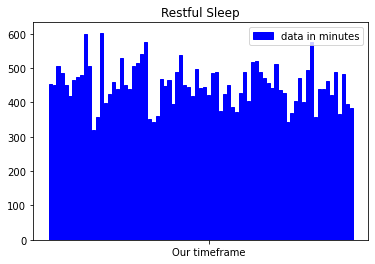

The maximum minutes of sleep was 603 minutes, or 10.05 hours.
The minimum minutes of sleep was 320 minutes, or 5.33 hours.


In [43]:
utils.sleep_bar_chart(restful_minutes, "data in minutes", "Restful Sleep", 40)
utils.compute_min_and_max(restful_minutes)

After looking into visualizations, we can formulate hypotheses about our data.

Specifically, I will predict that the day of the week during the school year is correlated to the amount of sleep I received that night.

* On Tuesday and Thursday nights, I feel I typically have more homework due that night or the next day, as compared to Monday and Wednesday nights.  
Therefore, I would find it reasonable if I slept more on Monday and Wednesday, as fewer assignments are usually due the day of or the day after.
* Big Question: 
    * On average, did I receive more sleep Monday and Wednesday nights in comparison to Tuesday and Thursday nights (during the school year)?

In order to compare sleep minutes to days of the week, we have to merge and join these two dataframes on the date attribute.

In [44]:
days_of_week_df = utils.load_and_store_data("days_of_week.csv")
merged_df = sleep_data_df.merge(days_of_week_df, on="Start")
merged_df.to_csv("merged_df")

## Classification Results

We will start with the 5 Step Hypothesis Approach and verify it afterwards with kNN!

Let's use the 5 Step Hypothesis Testing Approach:
1. Identify the null and alternative hypothesis
2. Select the level of significance of the test
3. Select the appropriate test statistic
4. Formulate the decision rule
5. Make a decision

**1. Identify the null and alternative hypothesis**

* Null hypothesis
    * On average, I slept for fewer or the same amount of minutes on Monday and Wednesday nights in comparison to Tuesday and Thursday nights. 
        * $H_0$: $\mu_{MW}$ $\le$ $\mu_{TTh}$

* Alternative hypothesis
    * On average, I slept for more minutes on Monday and Wednesday nights in comparison to Tuesday and Thursday nights. 
        * $H_1$: $\mu_{MW}$ > $\mu_{TTh}$

**2. Select the level of significance of the test**

* Level of significance 
    * $\alpha$ = 0.05

**3. Select the appropriate test statistic**

* T-test statistic
    * Two sample (independent) and one tailed
* So, use this formula:
    * t = $\frac{\overline{X}_1 - \overline{X}_2}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}}$

**4. Formulate the decision rule**

* From our table, we can conclude that our t-critical value is 1.717.
    * Therefore we can formulate the following decision rules:
        * If our t-computed value is greater than 1.717, we reject $H_0$.
        * If our t-computed value is less than or equal to 1.717, we do not reject $H_0$.

**5. Make a decision**

In [45]:
monday = utils.get_restful_minutes(merged_df, "Monday")
wednesday = utils.get_restful_minutes(merged_df, "Wednesday")
tuesday = utils.get_restful_minutes(merged_df, "Tuesday")
thursday = utils.get_restful_minutes(merged_df, "Thursday")

mon_wed = utils.append_two_cols(monday, wednesday)
tues_thurs = utils.append_two_cols(tuesday, thursday)

In [46]:
t_critical = 1.717
t_computed, p_value = stats.ttest_ind(mon_wed, tues_thurs)
print("t-computed:", t_computed)
print("p-value:", p_value/2)

t-computed: 0.25981552368759847
p-value: 0.3981377535032026


* **Decision-making time!**
    * Since our t-computed value, 0.2598, is less than 1.717, with a 0.05 level of significance, we can conclude from our decision rule that we do not reject $H_0$.
    * Thus, I received more sleep on Monday and Wednesday nights compared to Tuesday and Thursday nights.

* So, what was the difference in my sleep on Monday and Wednesday nights in comparison to Tuesday and Thursday nights?

Let's calculate each sample's average...

In [47]:
utils.print_and_average(mon_wed, "Monday and Wednesday")
utils.print_and_average(tues_thurs, "Tuesday and Thursday")

Monday and Wednesday average minutes: 439.59   average hours: 7.33
Tuesday and Thursday average minutes: 434.91   average hours: 7.25


Let's visualize Monday and Wednesday nights' sleep...

[453, 418, 473, 357, 399, 452, 507, 342, 468, 538, 444, 422, 488, 372, 489, 470, 441, 370, 471, 439, 463, 395]


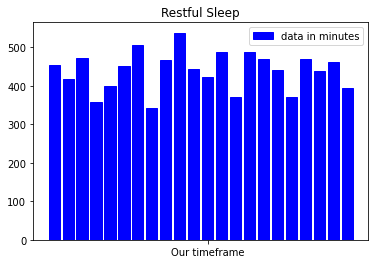

The maximum minutes of sleep was 538 minutes, or 8.97 hours.
The minimum minutes of sleep was 342 minutes, or 5.7 hours.


In [48]:
utils.sleep_bar_chart(mon_wed, "data in minutes", "Restful Sleep", 11)
utils.compute_min_and_max(mon_wed)

Now how does this compare to Tuesday and Thursday nights' sleep...

[466, 452, 603, 320, 438, 530, 360, 353, 451, 490, 486, 445, 427, 388, 457, 490, 403, 344, 439, 358, 384, 484]


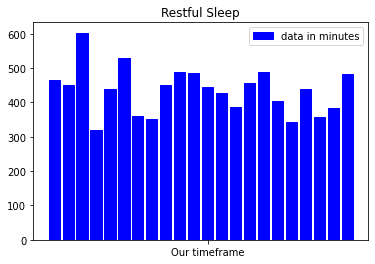

The maximum minutes of sleep was 603 minutes, or 10.05 hours.
The minimum minutes of sleep was 320 minutes, or 5.33 hours.


In [49]:
utils.sleep_bar_chart(tues_thurs, "data in minutes", "Restful Sleep", 11)
utils.compute_min_and_max(tues_thurs)

Let's support these results by also using the kNN classifier...

In [50]:
import pandas as pd

comparison_values = utils.write_yes_or_no_values(mon_wed,tues_thurs)
comparison_values_series = pd.Series(comparison_values)
comparison_values_series.to_csv("comparison_values.csv")

mon_wed = pd.Series(mon_wed)
tues_thurs = pd.Series(tues_thurs)

days_and_values_df = pd.concat([mon_wed,tues_thurs],axis=1)
days_and_values_df.to_csv("days_and_values")

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = days_and_values_df
y = comparison_values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

knn_clf = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn_clf.fit(X_train, y_train)
y_predicted = knn_clf.predict(X_test)

print("y predicted:", y_predicted)

y predicted: ['N' 'N' 'Y' 'Y' 'Y' 'Y']


In [52]:
import scipy.stats as stats

x = tues_thurs
y = mon_wed

m, b, r, p_val, std_err = stats.linregress(x, y)
print("m:", m, "b:", b, "r:", r)

m: 0.35076948109691247 b: 287.0380729483973 r: 0.46828081779192093


From kNN, we can see that it predicts that the majority of the time I will recieve more sleep on Monday and Wednesday nights in comparison to Tuesday and Thursday nights.

* I am evaluating performance based on how likely it is to receive those results.
* Classification is tricky because of the various labels and transformations involved.

## Conclusion

* The dataset records my sleep data in minutes from August 31, 2021 to November 15, and because I compared days of the week, classification required additional parsing to correct results.

* I used kNN and the 5 step hypothesis approach, and I could potentially improve performance by removing columns of data that are irrelevant to the data.

* With sleep, there are always ethical concerns regarding privacy, and it would be important to let people know they are part of an experiment if a mental health researcher was conducting experiments.